# Dataframes and Visualization with Pandas and Altair

## Last Updated: May 6th, 2021

This document was prepared by Bannhat, Sophie Howell, and Robin McDonald

In [3]:
import numpy as np               # general math operations
import matplotlib.pyplot as plt  # general plotting

In your Anaconda Prompt, please install the following: <br>
pip install pandas  <br>
pip install altair vega_datasets

# Pandas
[Pandas](https://pandas.pydata.org/) is a common library used for data manipulation and analysis in python. It provides a way to import a file such as a .csv or Microsoft Excel sheet into a table-like structure they call a `Dataframe` and clean up the data. It is then easy to use another package (such as altair) to easily plot data from the dataframe. <br>
Following a standard convention, we import `pandas` as `pd`.

In [2]:
import pandas as pd              # pandas dataframes

Online resources include the documentation from [Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) as well as many online tutorials.

## Basics of Data Importation:

1. Export data as a .csv. For less memory usage, clean up the data before exportation.
2. Use `df=pd.read_csv(fileName)` to import your data frame. Here you can also selectively import data, choose a different seperation style such as '\t' for tab, '\s+' for multiple spaces, or the default ',' for commas, and rename/index each column/row.
3. See your truncated Dataframe by`df.head()`. You can input an int within () to see that many rows.
6. If desired, save the file as `df.to_csv(filename)`.

Note, there are ways to directly import an excel file using df = pd.read_excel("sample.xlsx")

In [6]:
fileName = 'GrowthMedia.csv' # file is in the same folder. 
# Other ways to reference your file: 'url', 'subfolder/filename.csv', or full path (r"C:\Users\Robin\Downloads\filename.csv")

df = pd.read_csv(fileName) # read data from file to dataframe
df.head()# shows the first few rows up to the integer you specify inside ()

,Ind_Ext,Force_Ext,Ind_Ret,Force_Ret,Ind_Away,Force_Away,Ind_Ext2,Force_Ext2,IndentXWave,IndentFitWave
0,-0.000001,-5.270000e-10,3.190000e-08,4.780000e-08,-0.000001,4.390000e-09,3.890000e-09,2.420000e-09,-0.000001,0.0
1,-0.000001,-6.150000e-10,3.220000e-08,4.920000e-08,-0.000001,4.470000e-09,3.190000e-08,4.780000e-08,-0.000001,0.0
2,-0.000001,-8.080000e-10,3.230000e-08,4.790000e-08,-0.000001,4.340000e-09,NaN,NaN,-0.000001,0.0
3,-0.000001,-7.320000e-10,3.210000e-08,4.620000e-08,-0.000001,4.850000e-09,NaN,NaN,-0.000001,0.0
4,-0.000001,-5.500000e-10,3.170000e-08,4.440000e-08,-0.000001,4.700000e-09,NaN,NaN,-0.000001,0.0
5,-0.000001,-2.860000e-10,3.110000e-08,4.280000e-08,-0.000001,4.440000e-09,NaN,NaN,-0.000001,0.0
6,-0.000001,-1.560000e-10,3.040000e-08,4.120000e-08,-0.000001,4.900000e-09,NaN,NaN,-0.000001,0.0


As you can see, this data is an exported force-indentation curve from Atomic Force Microscopy software that has some unnecessary columns we will clean up.

In [7]:
# Delete a column/row of data based on name using df.drop
df.drop(['Ind_Away','Force_Away','Ind_Ext2','Force_Ext2'], axis=1, inplace=True) # axis 1 for columns, axis 0 for rows
df.head()

,Ind_Ext,Force_Ext,Ind_Ret,Force_Ret,IndentXWave,IndentFitWave
0,-0.000001,-5.270000e-10,3.190000e-08,4.780000e-08,-0.000001,0.0
1,-0.000001,-6.150000e-10,3.220000e-08,4.920000e-08,-0.000001,0.0
2,-0.000001,-8.080000e-10,3.230000e-08,4.790000e-08,-0.000001,0.0
3,-0.000001,-7.320000e-10,3.210000e-08,4.620000e-08,-0.000001,0.0
4,-0.000001,-5.500000e-10,3.170000e-08,4.440000e-08,-0.000001,0.0


## Adjustments During Import
Alternatively, you can just import the data you need. When reading the file, specify the columns with `usecols = []` or use `skiprows = []` to not include particular rows. These both take integers with the index starting with zero. <br>
The `header = int` allows you to adjust which row contains the names of the columns. <br>
`names =[]` alters the names of the columns

In [8]:
# Alternatively, only import needed data
fileName = 'GrowthMedia.csv'
df = pd.read_csv(fileName, header = 0, usecols = [0, 1, 2,3, 8,9], names=['Ind_Ext (nm)','Force_Ext (nN)','Ind_Ret (nm)','Force_Ret (nN)','Ind_Fit (nm)','Force_Fit (nN)'])
df.head()

,Ind_Ext (nm),Force_Ext (nN),Ind_Ret (nm),Force_Ret (nN),Ind_Fit (nm),Force_Fit (nN)
0,-0.000001,-5.270000e-10,3.190000e-08,4.780000e-08,-0.000001,0.0
1,-0.000001,-6.150000e-10,3.220000e-08,4.920000e-08,-0.000001,0.0
2,-0.000001,-8.080000e-10,3.230000e-08,4.790000e-08,-0.000001,0.0
3,-0.000001,-7.320000e-10,3.210000e-08,4.620000e-08,-0.000001,0.0
4,-0.000001,-5.500000e-10,3.170000e-08,4.440000e-08,-0.000001,0.0


Using matplotlib to plot multiple lines by specifying the columns of the data frame.

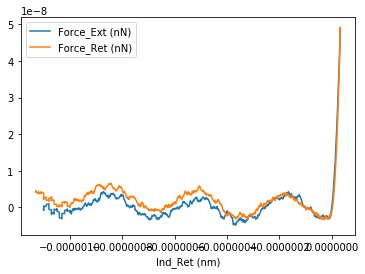

In [9]:
ax = plt.gca()
df.plot(kind='line', x='Ind_Ext (nm)', y='Force_Ext (nN)',ax=ax)
df.plot(kind='line',x='Ind_Ret (nm)', y='Force_Ret (nN)',ax=ax)
plt.show()

## Further Manipulation and Statistics
1. Copying a portion to a new `DataFrame`
2. Truncating based on a condition
3. Concatenate DataFrames
4. Creating `DataFrame` in Python
5. Statistics (mean, median, SD, etc)
4. Spliting into multiple lines

1. Copying particular columns to a new `DataFrame`

In [11]:
df.head()

,Ind_Ext (nm),Force_Ext (nN),Ind_Ret (nm),Force_Ret (nN),Ind_Fit (nm),Force_Fit (nN)
0,-0.000001,-5.270000e-10,3.190000e-08,4.780000e-08,-0.000001,0.0
1,-0.000001,-6.150000e-10,3.220000e-08,4.920000e-08,-0.000001,0.0
2,-0.000001,-8.080000e-10,3.230000e-08,4.790000e-08,-0.000001,0.0
3,-0.000001,-7.320000e-10,3.210000e-08,4.620000e-08,-0.000001,0.0
4,-0.000001,-5.500000e-10,3.170000e-08,4.440000e-08,-0.000001,0.0


In [12]:
df1 = df[['Ind_Ext (nm)','Force_Ext (nN)']].copy()
df2 = df[['Ind_Ret (nm)','Force_Ret (nN)']].copy()
df3 = df[['Ind_Fit (nm)','Force_Fit (nN)']].copy()
df1.head()

,Ind_Ext (nm),Force_Ext (nN)
0,-0.000001,-5.270000e-10
1,-0.000001,-6.150000e-10
2,-0.000001,-8.080000e-10
3,-0.000001,-7.320000e-10
4,-0.000001,-5.500000e-10


2. Next, we can truncate the DataFrame. <br>
If a boolean condition is met, we'll keep the row in the DataFrame. In this example, we want to chop off most of the baseline before 0 nm of indentation.

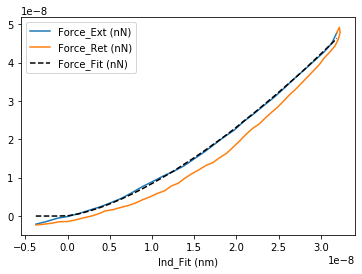

In [13]:
truncatedExt = df1[(df1["Ind_Ext (nm)"]>-4e-9)]
truncatedRet = df2[(df2["Ind_Ret (nm)"]>-4e-9)]
truncatedFit = df3[(df3["Ind_Fit (nm)"]>-4e-9)]

# Using matplotlib.pyplot to show our manipulated data
ax = plt.gca()
truncatedExt.plot(kind='line', x='Ind_Ext (nm)', y='Force_Ext (nN)',ax=ax)
truncatedRet.plot(kind='line', x='Ind_Ret (nm)', y='Force_Ret (nN)',ax=ax)
truncatedFit.plot(x='Ind_Fit (nm)', y='Force_Fit (nN)',style='k--',ax=ax)
plt.show()

3. Now we can recombine our 3 DataFrames back into one table. As shown before, we can plot multiple lines from one data sheet as long as we set x and y to the appropriate column.

In [14]:
df_all = pd.concat([df1, df2,df3], axis=1)
df_all.head()

,Ind_Ext (nm),Force_Ext (nN),Ind_Ret (nm),Force_Ret (nN),Ind_Fit (nm),Force_Fit (nN)
0,-0.000001,-5.270000e-10,3.190000e-08,4.780000e-08,-0.000001,0.0
1,-0.000001,-6.150000e-10,3.220000e-08,4.920000e-08,-0.000001,0.0
2,-0.000001,-8.080000e-10,3.230000e-08,4.790000e-08,-0.000001,0.0
3,-0.000001,-7.320000e-10,3.210000e-08,4.620000e-08,-0.000001,0.0
4,-0.000001,-5.500000e-10,3.170000e-08,4.440000e-08,-0.000001,0.0


4. Creating a new `DataFrame` in pandas.

In [16]:
# intialise data of lists.
data = {'Name':['Sophie', 'Bannhat', 'Robin'],
        'Age':[21, 21, 20],
        'Movie Rating':[60,70,76],
        'Email':['shhowell@caltech.edu','bphat@caltech.edu','robinmcd@caltech.edu']}
  
# Create DataFrame
df = pd.DataFrame(data)
df.head()

,Name,Age,Movie Rating,Email
0,Sophie,21,60,shhowell@caltech.edu
1,Bannhat,21,70,bphat@caltech.edu
2,Robin,20,76,robinmcd@caltech.edu


5. Basic statistics use `df["columnname"].mean()` or `.median()`, `.max()`, `.min()`

In [17]:
df["Age"].mean()

20.666666666666668

In [19]:
df[["Age", "Movie Rating"]].describe()

,Age,Movie Rating
count,3.000000,3.000000
mean,20.666667,68.666667
std,0.577350,8.082904
min,20.000000,60.000000
25%,20.500000,65.000000
50%,21.000000,70.000000
75%,21.000000,73.000000
max,21.000000,76.000000


6. String split breaks down entries into seperate columns.

In [20]:
df.head()

,Name,Age,Movie Rating,Email
0,Sophie,21,60,shhowell@caltech.edu
1,Bannhat,21,70,bphat@caltech.edu
2,Robin,20,76,robinmcd@caltech.edu


In [21]:
split = df['Email'].str.split('@',expand=True).rename(columns={0:'User',1:'Organization'})
split

,User,Organization
0,shhowell,caltech.edu
1,bphat,caltech.edu
2,robinmcd,caltech.edu


In [22]:
df[['User','Organization']]=df['Email'].str.split('@',expand=True)
df

,Name,Age,Movie Rating,Email,User,Organization
0,Sophie,21,60,shhowell@caltech.edu,shhowell,caltech.edu
1,Bannhat,21,70,bphat@caltech.edu,bphat,caltech.edu
2,Robin,20,76,robinmcd@caltech.edu,robinmcd,caltech.edu


## Altair

[Altair](https://altair-viz.github.io/index.html) is a visualization library based on the JSON visualization library called Vega. Please check out their example gallery below to see all kinds of different plots including geography maps, population plots, and interactive charts.

In [23]:
from IPython.display import HTML
HTML('<iframe src=https://altair-viz.github.io/gallery/index.html width=700 height=350></iframe>')

C:\Users\robin\anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Altair easily integrates with DataFrames used in Pandas, as you can just reference the data by its column names. And remember to do the following import:

In [4]:
import altair as alt

Note that altair allows you to read up to 5000 rows by default (to prevent large files). It is good to clean up your data first before you plot it. If you want to disable this limit, uncomment the following:

In [9]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## Scatterplots

There are a wide range of options available for simple plots. Plots can be layered, or can be outputted side by side for easy comparison. 
In this example we will be looking at the results of Charpy impact testing on cooled steel and aluminum samples to characterize ductile-to-brittle transitions in the metals. The energy in Joules represents the amount of energy required to break each sample.

In [5]:
steel= pd.read_csv("/Users/howells/Desktop/steeldata.csv")

In [6]:
steel.head(3) #See what the data looks like

,Temperature (K),Energy (J)
0,99.897242,2.71164
1,290.000000,79.99338
2,200.910595,4.06746


In [7]:
alum = pd.read_csv("/Users/howells/Desktop/aldata.csv")

# If your data does not have headers, you would write pd.read_csv("/Users/howells/Desktop/aldata.csv", header=None)
# You can supply column headers with the command alum.colums=["x","y"].

In [11]:
s=alt.Chart(steel).mark_circle(size=60,color='blue',text ='Steel').encode(
    x='Temperature (K)',
    y='Energy (J)',
    
).properties(title='Steel')

# Setting a chart function (alt.Chart()) equal to a variable suppresses its output. 
# The type of graph is determined by mark_circle() for a scatterplot, mark_line() for a line graph, etc. 
# Various parameters can be edited within the mark_circle() function, but not necessary.
# The encode() function must have axis labels that correctly correspond to the column names in the data.
# You can tack on several other configurations to this simple shell code by adding .function1().function(2) etc.

In [12]:
a=alt.Chart(alum).mark_circle(size=60,color='red',text='Aluminum').encode(
    x='Temperature (K)',
    y='Energy (J)',
    ).properties(title='Aluminum')
    

In [13]:
alt.concat(s,a)
#The concatenate function is an easy way to display graphs side-by-side.

alt.ConcatChart(...)

Now suppose we would like to overlay separate graphs or data on top of one other, such as data and a line of best fit.

In [15]:
transfer = pd.DataFrame([[128, 1], [64,1], [32, .980], [16, .915], [8, .748], [4, .493], [2, .275], [1, .141], 
                         [0.5, .072],  [0.25, .036]], columns = ['Frequency','Voltage'])

In [17]:
data2 = alt.Chart(transfer).mark_circle().encode(
    x='Frequency',
    y='Voltage'
)
data2 + data2.transform_regression('Frequency','Voltage',method='log').mark_line()

# To overlay two charts, you can use the simple command chart1 + chart2.
# Transform_regression creates a linear regression model by default, but can be changed to exponential, logarithmic,
# etc by the "method" parameter.

alt.LayerChart(...)

This regression line isn't a great fit, but luckily we know what a decent approximation for this data is. Our line should have the functional form of the following equation where we must estimate the value of the crossover frequency: 

$V(f) = \frac{fV_0}{\sqrt{f^2 + f^2_{crossover}}}$

In [20]:
x = np.arange(200)
source = pd.DataFrame({
  'Frequency': x,
  'Voltage': (1*x)/np.sqrt(7**2 + x**2)
})

alt.Chart(source).mark_line(point=True).encode(
    x = 'Frequency',
    y = 'Voltage'
)

alt.Chart(...)

This fit visually looks fairly similar to the shape of the data, but we can overlay them to make sure.

In [21]:
fit = alt.Chart(source).mark_line(point=True).encode(
    x = 'Frequency',
    y = 'Voltage'
)

data2 + fit

alt.LayerChart(...)

Our graphs overlap very well, so we know we have chosen a good fit for the data.

## Windowing Data 

A useful method of analysis that can be implemented with the help of pandas and altair is windowing data. This is when you limit the data points you are actually using to a small part of the full data that is available by multiplying a window function to your data.

This method is especially useful when looking at data in the form of oscillatory signals. Data gathered from an oscilloscope, for example, displays various signal voltages as a function of time. It is often required to take the Fourier transform of such signal data to gain meaningful measurements such as the frequency composition. 

Fast Fourier Transforms of non-periodic sine waves, however, are prone to leakage, in which the frequency peak tends to broaden rather than producing a sharp, narrow peak. The amplitude of the frequency peak also tends to be lower than expected. Applying a window to the data, however, can reduce leakage for non-periodic waves. Minimizing the effect of this leakage can produce clearer frequency measurements for signal based data. 

However, for periodic data, applying a window can have the opposite effect, where the frequency measurement is clearer for the original data than the windowed data. 

The Hann window is a popular windowing function that can be applied to sine waves. 
A Hann window in the interval from $0\leq t \leq T$ is given by the following equation:

$w(t) = \frac{1}{2}[\ 1-\cos(\frac{2\pi t}{T})]\$

Since this window will be applied to a discrete data set, we can write it in terms of some index n over a list of data points over the interval $1\leq n \leq N$ as following:


$w(t) = \frac{1}{2}[\ 1-\cos(\frac{2\pi n}{N})]\$


We’re going to be looking at periodic waveform data, and we’ll be then taking the Fourier transform to confirm that the window does actually produce a broader frequency measurement. 

In [22]:
waveform= pd.read_csv("/Users/howells/Desktop/Hann.csv", header=None)
waveform.columns = ["x","y"]
alt.Chart(waveform).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

Now, we now need to apply a window to our data. We can do this by multiplying the y values of our data by our windowing function on the interval from $1\leq n \leq N$:

$z_n = w(n)y_n$

In [23]:
windowed = pd.read_csv("/Users/howells/Desktop/Hann.csv", header=None)
windowed.columns = ["x","y"]

In [24]:
lst2 = []

def hann(z):
    lst = windowed["y"].tolist()
    i = lst.index(z, 0, len(waveform))
    while i in lst2:
        j = i
        i = lst.index(z, j+1, len(waveform))
    lst2.append(i)
    w = 0.5*(1-np.cos(2*np.pi*i/len(waveform)))
    return w*z

In [25]:
windowed['y'] = windowed['y'].apply(hann)


In [26]:
alt.Chart(windowed).mark_line().encode(
    x='x',
    y='y'
)

alt.Chart(...)

As you can see, the graph looks much different than before, and is shaped almost like a Gaussian wave packet. 

So now, just to take this a step further and look at the effect of windowing on the Fourier transform, lets take the Fourier transform of both the original and the windowed data. We can do this fairly simply with scipy, however this returns an array that includes imaginary values, so we just have to do a little bit of manipulation to get all real values, and convert this back into a dataframe so that we can plot it with altair as follows.


In [33]:
import scipy as py

fourier = py.fft(waveform['y'])
fourier1 = np.absolute(fourier)
fourier2 = np.square(fourier1)
fourier3 = pd.DataFrame(fourier2, columns=['Amplitude'])
alt.Chart(fourier3.reset_index()).mark_line().encode(
    alt.X('index:Q',
       
    ),
    y='Amplitude:Q'
)

alt.Chart(...)

In [36]:
fft = py.fft(windowed['y'])
fft1 = np.absolute(fft)
fft2 = np.square(fft1)
fft3 = pd.DataFrame(fft2, columns=['Amplitude'])
alt.Chart(fft3.reset_index()).mark_line().encode(
    alt.X('index:Q',
        
    ),
    y='Amplitude:Q'
)

alt.Chart(...)

We can see that we have our frequency of oscillation peak at 10,000 Hz. The amplitude is clearly smaller for the windowed data at 1.6 million units of amplitude versus 6 million for the original data. However, we’re going to need to zoom in to see what the effect on the shape of the peaks is like.


In [38]:
alt.Chart(fourier3.reset_index()).mark_line().encode(
    alt.X('index:Q',
        scale=alt.Scale(domain=(9900, 10000))
    ),
    y='Amplitude:Q'
)

alt.Chart(...)

In [39]:
alt.Chart(fft3.reset_index()).mark_line().encode(
    alt.X('index:Q',
        scale=alt.Scale(domain=(9900, 10000))
    ),
    y='Amplitude:Q'
)

alt.Chart(...)

Zoomed in, we can see that the windowed data has a slightly broader frequency peak.
Thus we can see that windowing data does have an effect on the Fourier transform of the signal, and whether or not the frequency measurement becomes broader or sharper depends on whether your data is periodic or not.
